In [17]:
pip install pandas numpy matplotlib seaborn tensorflow plotly yfinance


Note: you may need to restart the kernel to use updated packages.


In [19]:
import yfinance as yf

# Fetch ETF data
etf_ticker = "NIFTYBEES.NS"  # Example ETF: NIFTYBEES
data = yf.download(etf_ticker, start="2021-01-01", end="2024-11-27")
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price                        Adj Close        Close         High          Low  \
Ticker                    NIFTYBEES.NS NIFTYBEES.NS NIFTYBEES.NS NIFTYBEES.NS   
Date                                                                            
2021-01-01 00:00:00+00:00   149.570007   149.570007   159.679993   147.649994   
2021-01-04 00:00:00+00:00   150.710007   150.710007   150.899994   148.949997   
2021-01-05 00:00:00+00:00   151.300003   151.300003   159.699997   149.750000   
2021-01-06 00:00:00+00:00   151.220001   151.220001   159.699997   145.580002   
2021-01-07 00:00:00+00:00   151.199997   151.199997   155.000000   151.009995   

Price                             Open       Volume  
Ticker                    NIFTYBEES.NS NIFTYBEES.NS  
Date                                                 
2021-01-01 00:00:00+00:00   159.679993       767502  
2021-01-04 00:00:00+00:00   150.589996      1729074  
2021-01-05 00:00:00+00:00   159.699997      2248517  
2021-01-06 00:00:00+00:00  

In [13]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close']])

# Create features and labels
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 90
X, Y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, Y, epochs=20, batch_size=32)


C:\Users\jinay\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - loss: 0.1604
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0092
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0052
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 0.0047
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0040
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0045
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0035
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 0.0041
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0039
Epoch 10/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0035
Epoch 11/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0043
Epoch 12/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0036
Epoch 13/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0033
Epoch 14/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0030
Epoch 15/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0033
E

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


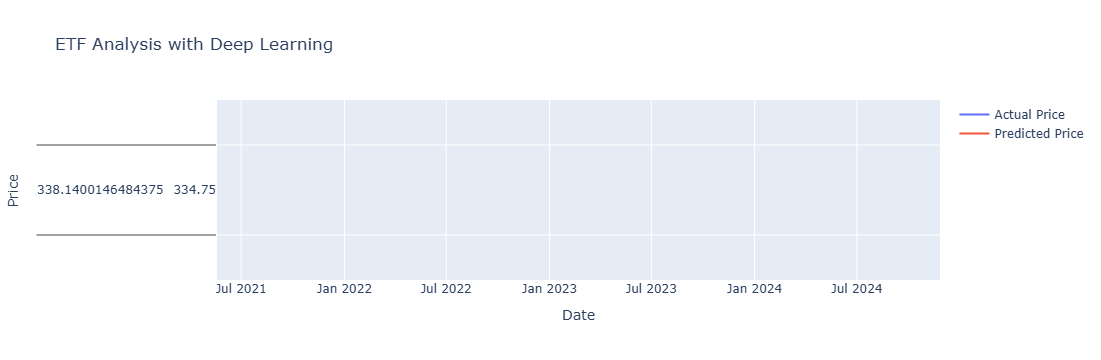

In [15]:
import plotly.graph_objects as go

# Predict and scale back
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)

# Plot actual vs predicted
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index[time_step+1:], y=data['Close'][time_step+1:], mode='lines', name='Actual Price'))
fig.add_trace(go.Scatter(x=data.index[time_step+1:], y=predictions.flatten(), mode='lines', name='Predicted Price'))

fig.update_layout(
    title="ETF Analysis with Deep Learning",
    xaxis_title="Date",
    yaxis_title="Price",
    hovermode="x unified"
)

fig.show()


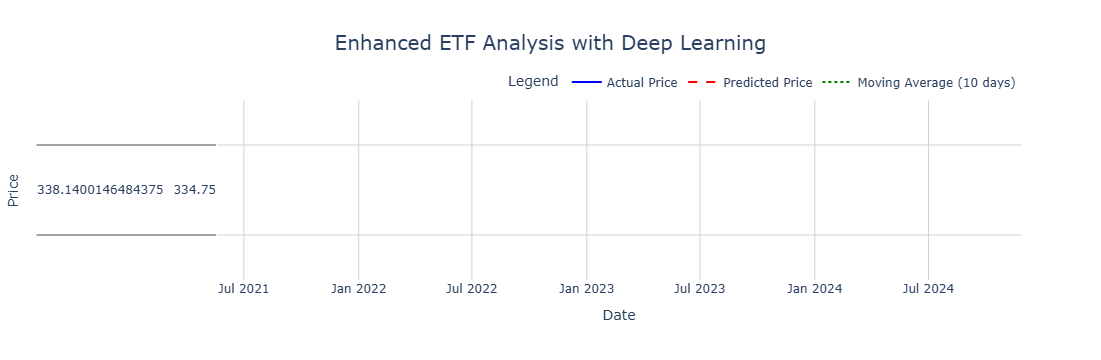

In [16]:
import plotly.graph_objects as go
import pandas as pd

# Prepare dates and data for visualization
dates = data.index[time_step+1:]
actual_prices = data['Close'][time_step+1:]
predicted_prices = predictions.flatten()

# Calculate moving average for actual prices
moving_avg = actual_prices.rolling(window=10).mean()

# Create the figure
fig = go.Figure()

# Add actual prices
fig.add_trace(go.Scatter(
    x=dates, 
    y=actual_prices, 
    mode='lines',
    name='Actual Price',
    line=dict(color='blue', width=2),
    hovertemplate='<b>Date:</b> %{x}<br><b>Actual Price:</b> %{y:.2f}<extra></extra>'
))

# Add predicted prices
fig.add_trace(go.Scatter(
    x=dates, 
    y=predicted_prices, 
    mode='lines',
    name='Predicted Price',
    line=dict(color='red', dash='dash', width=2),
    hovertemplate='<b>Date:</b> %{x}<br><b>Predicted Price:</b> %{y:.2f}<extra></extra>'
))

# Add moving average
fig.add_trace(go.Scatter(
    x=dates, 
    y=moving_avg, 
    mode='lines',
    name='Moving Average (10 days)',
    line=dict(color='green', dash='dot', width=2),
    hovertemplate='<b>Date:</b> %{x}<br><b>Moving Avg:</b> %{y:.2f}<extra></extra>'
))

# Add layout and styles
fig.update_layout(
    title=dict(
        text="Enhanced ETF Analysis with Deep Learning",
        x=0.5,
        font=dict(size=20)
    ),
    xaxis_title="Date",
    yaxis_title="Price",
    hovermode="x unified",
    legend=dict(
        title="Legend",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template="plotly_white"
)

# Add vertical gridlines for better readability
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')

# Show the graph
fig.show()


In [9]:
etf_info = yf.Ticker(etf_ticker).info
fundamentals = {
    "Name": etf_info.get("longName"),
    "Category": etf_info.get("category"),
    "Expense Ratio": etf_info.get("annualReportExpenseRatio"),
    "Inception Date": etf_info.get("inceptionDate"),
    "Assets Under Management": etf_info.get("totalAssets")
}
print(fundamentals)


{'Name': 'Nippon India ETF Nifty 50 BeES', 'Category': None, 'Expense Ratio': None, 'Inception Date': None, 'Assets Under Management': None}
